## Introducci√≥n

### Telecom X

Esta es una empresa de servicios de internet y telefon√≠a, la cual enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la p√©rdida de clientes


**Objetivo:**
Recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer informaci√≥n valiosa, donde podamos identificar las causas de abandono de los clientes y poder a partir de esto brindar recomendaciones y acciones a tomar.

### Importamos librer√≠as

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Extracci√≥n de datos

In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
data_from_url = pd.read_json(url)


df = pd.json_normalize(data_from_url.to_dict('records'), sep='_')
df.head()

customerID Churn customer_gender  customer_SeniorCitizen customer_Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer_Dependents  customer_tenure phone_PhoneService phone_MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet_InternetService  ... internet_OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet_DeviceProtection internet_TechSupport internet_StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet_StreamingMovies account_Contract account_PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account_PaymentMethod account_Charges_Monthly  account_Charges_Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

Diccionario de datos

* customerID: n√∫mero de identificaci√≥n √∫nico de cada cliente
* Churn: si el cliente dej√≥ o no la empresa
* gender: g√©nero (masculino y femenino)
* SeniorCitizen: informaci√≥n sobre si un cliente tiene o no una edad igual o mayor a 65 a√±os
* Partner: si el cliente tiene o no una pareja
* Dependents: si el cliente tiene o no dependientes
* tenure: meses de contrato del cliente
* PhoneService: suscripci√≥n al servicio telef√≥nico
* MultipleLines: suscripci√≥n a m√°s de una l√≠nea telef√≥nica
* InternetService: suscripci√≥n a un proveedor de internet
* OnlineSecurity: suscripci√≥n adicional de seguridad en l√≠nea
* OnlineBackup: suscripci√≥n adicional de respaldo en l√≠nea
* DeviceProtection: suscripci√≥n adicional de protecci√≥n del dispositivo
* TechSupport: suscripci√≥n adicional de soporte t√©cnico, menor tiempo de espera
* StreamingTV: suscripci√≥n de televisi√≥n por cable
* StreamingMovies: suscripci√≥n de streaming de pel√≠culas
* Contract: tipo de contrato
* PaperlessBilling: si el cliente prefiere recibir la factura en l√≠nea
* PaymentMethod: forma de pago
* Charges.Monthly: total de todos los servicios del cliente por mes
* Charges.Total: total gastado por el cliente

### Primer vistazo de la estructura del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [4]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

Tenemos 7267 filas y 21 columnas

In [5]:
df.shape

(7267, 21)

## Limpieza y Tratamiento de Datos

No existen duplicados, lo cual es bueno para poder analizarlos

In [6]:
fs=df.shape
print('formato original : {}'.format(fs))

df = df.drop_duplicates()

ns= df.shape
print('Existen {} duplicados'.format((fs[0])-(ns[0])))
print('nuevo formato : {}'.format(ns))

formato original : (7267, 21)
Existen 0 duplicados
nuevo formato : (7267, 21)


Corregimos los formatos de algunas columnas para poder trabajar mejor con ellas

In [7]:
df['account_Charges_Total'] = df['account_Charges_Total'].replace(' ', np.nan)
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].map({0:'No',1:'Yes'})

In [8]:
df.dtypes

customerID                    object
Churn                         object
customer_gender               object
customer_SeniorCitizen        object
customer_Partner              object
customer_Dependents           object
customer_tenure                int64
phone_PhoneService            object
phone_MultipleLines           object
internet_InternetService      object
internet_OnlineSecurity       object
internet_OnlineBackup         object
internet_DeviceProtection     object
internet_TechSupport          object
internet_StreamingTV          object
internet_StreamingMovies      object
account_Contract              object
account_PaperlessBilling      object
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total        float64
dtype: object

Vemos que tenemos 11 datos nulos en la columna account_Charges_Total, pero buscaremos la manera de llenar estos datos con informaci√≥n del mismo dataset para que sea lo m√°s cercano a lo real.

In [9]:
df.isnull().sum()

customerID                    0
Churn                         0
customer_gender               0
customer_SeniorCitizen        0
customer_Partner              0
customer_Dependents           0
customer_tenure               0
phone_PhoneService            0
phone_MultipleLines           0
internet_InternetService      0
internet_OnlineSecurity       0
internet_OnlineBackup         0
internet_DeviceProtection     0
internet_TechSupport          0
internet_StreamingTV          0
internet_StreamingMovies      0
account_Contract              0
account_PaperlessBilling      0
account_PaymentMethod         0
account_Charges_Monthly       0
account_Charges_Total        11
dtype: int64

### Tratamiento de nulos

Tratamos los nulos, b√°sicamente el account_Charges_Total es igual al n√∫mero de meses que lleva el cliente en el servicio, multiplicado por el cargo mensual y el resultado de esa operaci√≥n lo guardamos en las columnas que est√©n vac√≠as en account_Charges_Total

In [10]:
df.loc[df['account_Charges_Total'].isnull(), 'account_Charges_Total'] = df['customer_tenure'] * df['account_Charges_Monthly']

In [11]:
df.isnull().sum()

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64

## An√°lisis Exploratorio de Datos

### Distribuciones

Revisando la distribuci√≥n de los datos en general, todo se ve bien, solo unos at√≠picos en la columna account_Charges_Total, pero nada de qu√© alertarse, ya que veremos bien la distribuci√≥n y haremos m√°s an√°lisis posteriormente

In [12]:
df.describe()

customer_tenure  account_Charges_Monthly  account_Charges_Total
count      7267.000000              7267.000000            7267.000000
mean         32.346498                64.720098            2277.182035
std          24.571773                30.129572            2268.648587
min           0.000000                18.250000               0.000000
25%           9.000000                35.425000             396.200000
50%          29.000000                70.300000            1389.200000
75%          55.000000                89.875000            3778.525000
max          72.000000               118.750000            8684.800000

Dando un vistazo r√°pido podemos ver que en columnas de s√≠ y no existen m√°s categor√≠as lo cual puede ser provocado por un error de tipificaci√≥n, pero es algo f√°cil de arreglar, en general podemos ver cuantas categor√≠as existen por columnas y un poco de su distribuci√≥n; sin embargo, corregiremos estos errores y realizaremos an√°lisis m√°s profundos.

In [13]:
df.describe(include=object)

customerID Churn customer_gender customer_SeniorCitizen  \
count         7267  7267            7267                   7267   
unique        7267     3               2                      2   
top     9995-HOTOH    No            Male                     No   
freq             1  5174            3675                   6085   

       customer_Partner customer_Dependents phone_PhoneService  \
count              7267                7267               7267   
unique                2                   2                  2   
top                  No                  No                Yes   
freq               3749                5086               6560   

       phone_MultipleLines internet_InternetService internet_OnlineSecurity  \
count                 7267                     7267                    7267   
unique                   3                        3                       3   
top                     No              Fiber optic                      No   
freq                  3495                     3198                    3608   

       internet_OnlineBackup internet_DeviceProtection internet_TechSupport  \
count                   7267                      7267                 7267   
unique                     3                         3                    3   
top                       No                        No                   No   
freq                    3182                      3195                 3582   

       internet_StreamingTV internet_StreamingMovies account_Contract  \
count                  7267                     7267             7267   
unique                    3                        3                3   
top                      No                       No   Month-to-month   
freq                   2896                     2870             4005   

       account_PaperlessBilling account_PaymentMethod  
count                      7267                  7267  
unique                        2                     4  
top                         Yes      Electronic check  
freq                       4311                  2445

In [14]:
def resumen_columna(col):
    return df[col].value_counts(normalize=False).to_frame('N√∫mero de registros')\
             .assign(Proporci√≥n=lambda x: (x['N√∫mero de registros'] / x['N√∫mero de registros'].sum() * 100).round(2))\
             .reset_index().rename(columns={'index': col})

In [15]:
cat = df.select_dtypes(include='object').columns[1:]

for i in cat:
  print(i)
  print(resumen_columna(i))
  print('\n\n')

Churn
  Churn  N√∫mero de registros  Proporci√≥n
0    No                 5174       71.20
1   Yes                 1869       25.72
2                        224        3.08



customer_gender
  customer_gender  N√∫mero de registros  Proporci√≥n
0            Male                 3675       50.57
1          Female                 3592       49.43



customer_SeniorCitizen
  customer_SeniorCitizen  N√∫mero de registros  Proporci√≥n
0                     No                 6085       83.73
1                    Yes                 1182       16.27



customer_Partner
  customer_Partner  N√∫mero de registros  Proporci√≥n
0               No                 3749       51.59
1              Yes                 3518       48.41



customer_Dependents
  customer_Dependents  N√∫mero de registros  Proporci√≥n
0                  No                 5086       69.99
1                 Yes                 2181       30.01



phone_PhoneService
  phone_PhoneService  N√∫mero de registros  Proporci√≥n
0     

#### Columna de cuentas diarias

In [16]:
df['Daily_Accounts'] = df['account_Charges_Monthly'] / 30

Revisando las distribuciones y lo que se capt√≥ anteriormente, se observ√≥ que la variable objetivo churn tiene algunos espacios en blanco, lo cual es grave, ya que esta columna es la que m√°s nos interesa para el an√°lisis y que no podemos calcular, a lo cual se decidi√≥ eliminar estos datos, ya que no son representativos y apenas son el 3% del dataset lo cual se cree que no influir√° en los resultados de este an√°lisis.

In [17]:
df = df[df['Churn'].isin(['Yes', 'No'])]

In [18]:
def graficos_cat(df, columna, label, palette=None):
    titulo = f"Distribuci√≥n de {label}"
def graficos_cat(df, columna, label, palette=None):
    titulo = f"Distribuci√≥n de {label}"

    plt.figure(figsize=(8, 5))
    sns.countplot(x=columna, data=df, order=df[columna].value_counts().index, palette=('gray' if palette is None else palette))
    plt.title(titulo)
    plt.xlabel(label)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

In [19]:
def graficos(columna, label, color):
  fig, axs = plt.subplots(1, 2, figsize=(20, 6))
  x = columna
  label = label
  titulo = f"Distribucion de {label}"
  color = color

  #Se hace el boxplot para visualizar los atipicos y la distribucion, vemos que existen atipicos.
  sns.boxplot( x=x, data= df, color=color, ax=axs[0], hue='Churn')
  axs[0].set_title(titulo)
  axs[0].set_xlabel(label)

  sns.histplot(data=df, x=x, kde=True, ax=axs[1])
  axs[1].set_title(titulo)
  axs[1].set_xlabel(label)

#### Churn

Como se puede observar, casi el 27% de los clientes ha abandonado la compa√±√≠a, lo cual corrobora lo que se planteaba en un principio. Una vez teniendo en cuenta esto, vamos a buscar cu√°les son las posibles causas.

In [20]:
resumen_columna('Churn')

Churn  N√∫mero de registros  Proporci√≥n
0    No                 5174       73.46
1   Yes                 1869       26.54

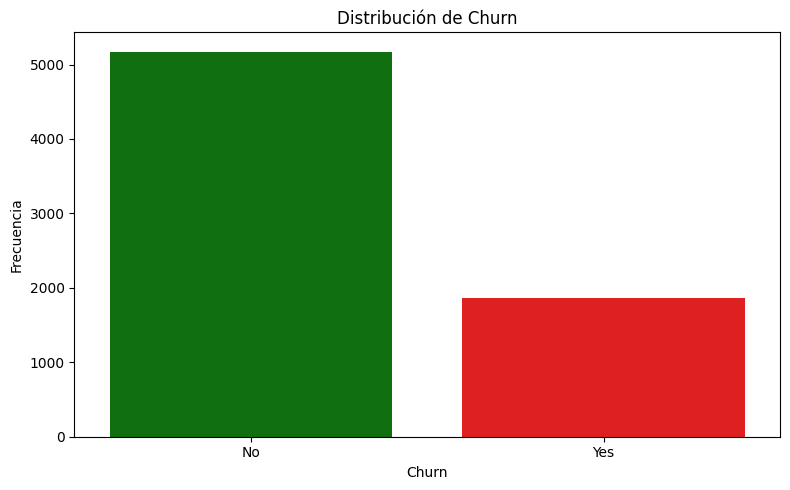

In [21]:
graficos_cat(df, 'Churn', 'Churn', palette={'No': 'Green', 'Yes': 'red'})

### Creaci√≥n de subgrupos para analizar tendencias de cada grupo

In [22]:
df_churn = df[df['Churn'] == 'Yes']
df_nochurn = df[df['Churn'] == 'No']

#### Antig√ºedad

Como se puede observar, el promedio de meses de antig√ºedad muestra un primer acercamiento donde personas que no abandonaron tienen una media de 37.6, frente a las que abandonaron de 17.97. Esto mostrando un indicio, pero no una certeza, ya que aunque el promedio es m√°s alto, a√∫n existen personas con varios meses que tambi√©n abandonaron, a lo cual veremos con m√°s de talle a lo que se debe.

In [23]:
print(f"Antiguedad promedio clientes que abandonaron: {df_churn['customer_tenure'].mean()}")
print(f"Antiguedad minima clientes que abandonaron: {df_churn['customer_tenure'].min()}")
print(f"Antiguedad maxima clientes que abandonaron: {df_churn['customer_tenure'].max()}")

Antiguedad promedio clientes que abandonaron: 17.979133226324237
Antiguedad minima clientes que abandonaron: 1
Antiguedad maxima clientes que abandonaron: 72


In [24]:
print(f"Antiguedad promedio clientes que no abandonaron: {df_nochurn['customer_tenure'].mean()}")
print(f"Antiguedad minima clientes que no abandonaron: {df_nochurn['customer_tenure'].min()}")
print(f"Antiguedad maxima clientes que no abandonaron: {df_nochurn['customer_tenure'].max()}")

Antiguedad promedio clientes que no abandonaron: 37.56996521066873
Antiguedad minima clientes que no abandonaron: 0
Antiguedad maxima clientes que no abandonaron: 72


Text(0.5, 0, 'Meses de Antig√ºedad')

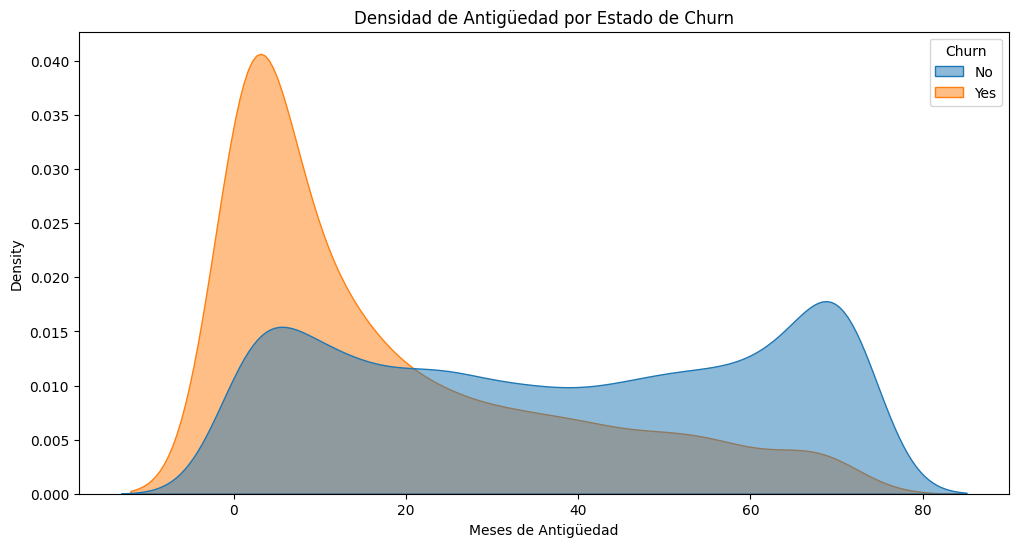

In [25]:
plt.figure(figsize=(12,6))
sns.kdeplot(
    data=df,
    x='customer_tenure',
    hue='Churn',
    fill=True,
    common_norm=False,
    palette=['#1f77b4','#ff7f0e'],
    alpha=0.5
)
plt.title('Densidad de Antig√ºedad por Estado de Churn')
plt.xlabel('Meses de Antig√ºedad')

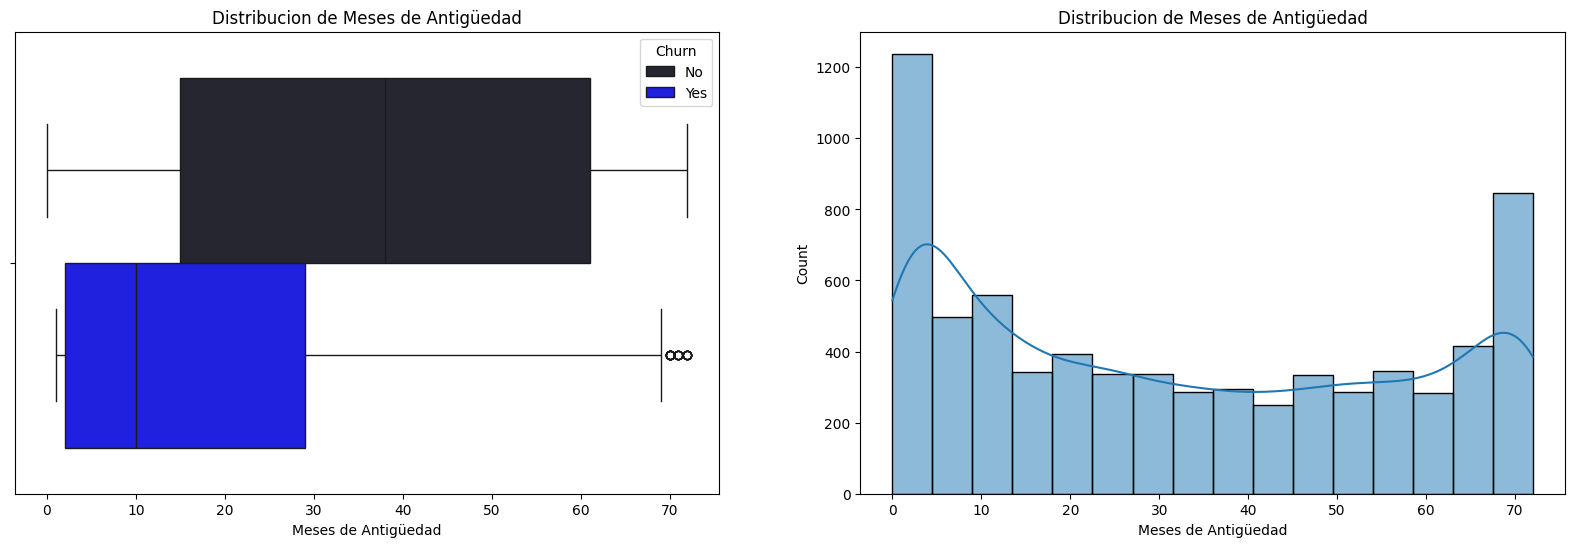

In [26]:
graficos('customer_tenure', 'Meses de Antig√ºedad', 'blue')

#### Tipo de contrato

Podemos notar que la mayor parte de los clientes tienen contrato de mes a mes con aproximadamente el 55% y de estos clientes el 42% tiende a irse de nuestra compa√±√≠a, lo cual no es nada favorable, as√≠ que una de las primeras acciones recomendadas es empezar a vender contratos de un a√±o o dos a√±os, ya que en estos tipos de contratos los que abandonan son menos del 12% para los de un a√±o y menos del 1% para los de dos a√±os, a lo cual ser√≠a ideal vender m√°s de estos contratos o crear un nuevo tipo de contrato de 3 o 6 meses buscando que los clientes tiendan a acostumbrarse a contratos m√°s largos, para esto podemos promocionar con m√°s beneficios a contratos largos.

In [27]:
resumen_columna('account_Contract')

account_Contract  N√∫mero de registros  Proporci√≥n
0   Month-to-month                 3875       55.02
1         Two year                 1695       24.07
2         One year                 1473       20.91

In [28]:
df.groupby('account_Contract')['Churn'].value_counts(normalize=True).unstack()

Churn                   No       Yes
account_Contract                    
Month-to-month    0.572903  0.427097
One year          0.887305  0.112695
Two year          0.971681  0.028319

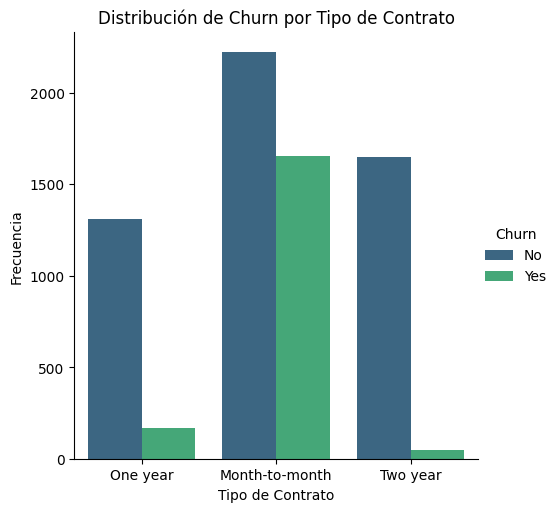

In [29]:
sns.catplot(
    x='account_Contract',
    hue='Churn',
    data=df,
    kind='count',
    palette='viridis'
)
plt.title('Distribuci√≥n de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frecuencia')
plt.show()

#### M√©todo de pago

En este caso encontramos que los pagos realizados por Electronic check son los que m√°s tienden a abandonar la compa√±√≠a con aproximadamente un 45% de los pagos que se hacen por este medio abandonan la compa√±√≠a, y aproximadamente el 34% realiza pagos por este medio, lo que podemos hacer es investigar posibles problemas con el medio de pago Electronic check, e incentivar otros medios de pago para reducir el churn

In [30]:
resumen_columna('account_PaymentMethod')

account_PaymentMethod  N√∫mero de registros  Proporci√≥n
0           Electronic check                 2365       33.58
1               Mailed check                 1612       22.89
2  Bank transfer (automatic)                 1544       21.92
3    Credit card (automatic)                 1522       21.61

In [31]:
df.groupby('account_PaymentMethod')['Churn'].value_counts(normalize=True).unstack()

Churn                            No       Yes
account_PaymentMethod                        
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067

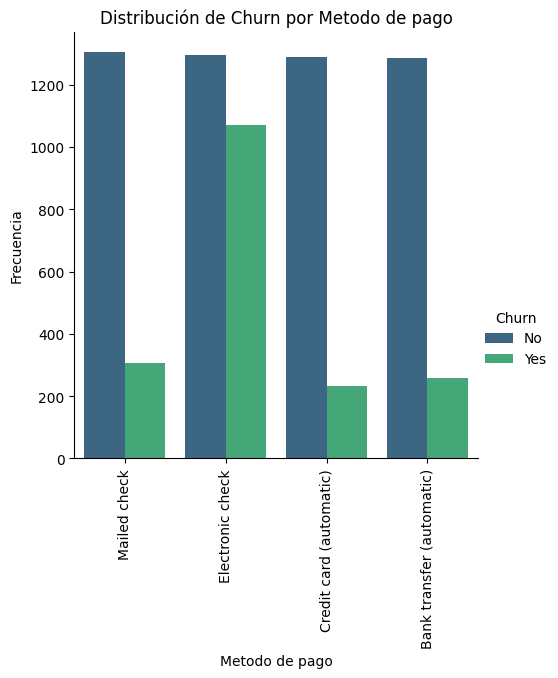

In [32]:
sns.catplot(
    x='account_PaymentMethod',
    hue='Churn',
    data=df,
    kind='count',
    palette='viridis'
)
plt.title('Distribuci√≥n de Churn por Metodo de pago')
plt.xlabel('Metodo de pago')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

####Genero

En general en el dataset muestra que nuestra proporci√≥n de hombres y mujeres es aproximadamente 50-50 a lo cual si vamos un poco m√°s all√° vemos que en general tanto de hombres, como de mujeres tenemos aproximadamente un 27% de abandono de la empresa, lo cual podemos decir que asumen un patr√≥n similar; sin embargo, lo analizaremos m√°s profundidad.

In [33]:
resumen_columna('customer_gender')

customer_gender  N√∫mero de registros  Proporci√≥n
0            Male                 3555       50.48
1          Female                 3488       49.52

In [34]:
df.groupby('customer_gender')['Churn'].value_counts(normalize=True).unstack()

Churn                  No       Yes
customer_gender                    
Female           0.730791  0.269209
Male             0.738397  0.261603

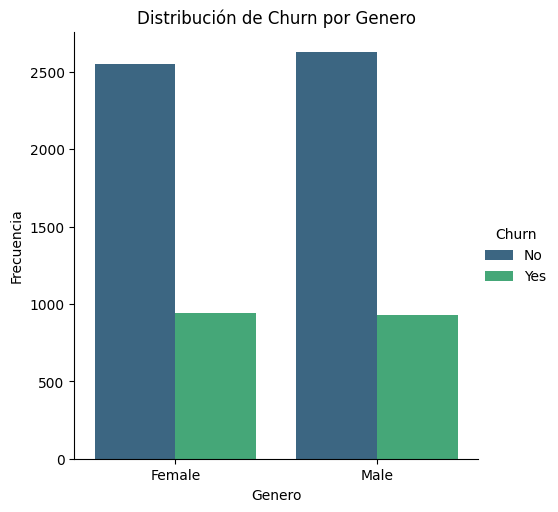

In [35]:
sns.catplot(
    x='customer_gender',
    hue='Churn',
    data=df,
    kind='count',
    palette='viridis'
)
plt.title('Distribuci√≥n de Churn por Genero')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')
plt.show()

#### Servicio de internet

Como podemos observar la mayor√≠a tiene un servicio de internet y la mayor√≠a tiene fibra √≥ptica con aproximadamente un 44%, de los cuales el 41% tienden a abandonar la compa√±√≠a a lo cual podemos revisar cuestiones de servicio o problemas con este servicio, ya que en los otros no se presenta esta tendencia y la tasa de abandono es baja.

In [36]:
resumen_columna('internet_InternetService')

internet_InternetService  N√∫mero de registros  Proporci√≥n
0              Fiber optic                 3096       43.96
1                      DSL                 2421       34.37
2                       No                 1526       21.67

In [37]:
df.groupby('internet_InternetService')['Churn'].value_counts(normalize=True).unstack()

Churn                           No       Yes
internet_InternetService                    
DSL                       0.810409  0.189591
Fiber optic               0.581072  0.418928
No                        0.925950  0.074050

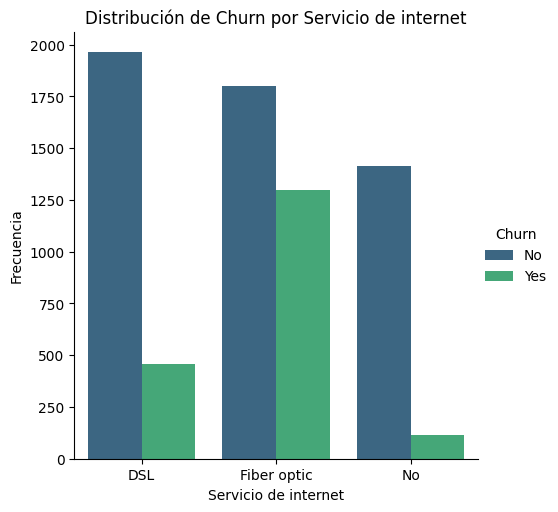

In [38]:
sns.catplot(
    x='internet_InternetService',
    hue='Churn',
    data=df,
    kind='count',
    palette='viridis'
)
plt.title('Distribuci√≥n de Churn por Servicio de internet')
plt.xlabel('Servicio de internet')
plt.ylabel('Frecuencia')
plt.show()

In [39]:
pd.crosstab(
    index=df[df['internet_InternetService']=='Fiber optic']['internet_OnlineSecurity'],
    columns=df['Churn'],
    normalize='index'
)

Churn                          No       Yes
internet_OnlineSecurity                    
No                       0.506424  0.493576
Yes                      0.781883  0.218117

#### Servicio de Telefon√≠a

Como podemos observar la mayor√≠a de los clientes tienen un servicio de telefon√≠a, en aproximadamente un 90%, de los cuales aproximadamente el 27% tiende a abandonar, aunque los que no tienen servicio andan en un porcentaje de abandono similar, la cantidad de clientes que si tienen servicio de telefon√≠a es mayor, como he mencionado anteriormente esto se puede deber a problemas con el servicio o problemas adicionales, a lo cual ser√° mejor busca estas causas, ya que generalmente las causas de abandono m√°s comunes son por problemas con el servicio.

In [40]:
resumen_columna('phone_PhoneService')

phone_PhoneService  N√∫mero de registros  Proporci√≥n
0                Yes                 6361       90.32
1                 No                  682        9.68

In [41]:
df.groupby('phone_PhoneService')['Churn'].value_counts(normalize=True).unstack()

Churn                     No       Yes
phone_PhoneService                    
No                  0.750733  0.249267
Yes                 0.732904  0.267096

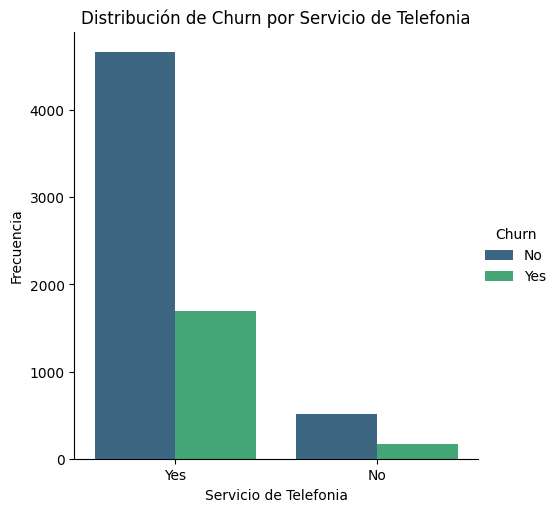

In [42]:
sns.catplot(
    x='phone_PhoneService',
    hue='Churn',
    data=df,
    kind='count',
    palette='viridis'
)
plt.title('Distribuci√≥n de Churn por Servicio de Telefonia')
plt.xlabel('Servicio de Telefonia')
plt.ylabel('Frecuencia')
plt.show()

#### Cargos mensuales

Otro factor que influye mucho en el abandono de la empresa puede ser este el account_Charges_Monthly, ya que algo curioso es que los clientes que pagan m√°s son los que tienden a abandonar la empresa, esto debido a precios altos, lo cual puede ser una raz√≥n bastante v√°lida, a lo cual podemos revisar para hacer promociones y reducciones de precio para estos clientes.

In [43]:
print(f"Cargos mensuales promedio clientes que abandonaron: {df_churn['account_Charges_Monthly'].mean()}")
print(f"Cargos mensuales minimos clientes que abandonaron: {df_churn['account_Charges_Monthly'].min()}")
print(f"Cargos mensuales maximos clientes que abandonaron: {df_churn['account_Charges_Monthly'].max()}")

Cargos mensuales promedio clientes que abandonaron: 74.44133226324237
Cargos mensuales minimos clientes que abandonaron: 18.85
Cargos mensuales maximos clientes que abandonaron: 118.35


In [44]:
print(f"Cargos mensuales promedio clientes que no abandonaron: {df_nochurn['account_Charges_Monthly'].mean()}")
print(f"Cargos mensuales minimos clientes que no abandonaron: {df_nochurn['account_Charges_Monthly'].min()}")
print(f"Cargos mensuales maximos clientes que no abandonaron: {df_nochurn['account_Charges_Monthly'].max()}")

Cargos mensuales promedio clientes que no abandonaron: 61.26512369540008
Cargos mensuales minimos clientes que no abandonaron: 18.25
Cargos mensuales maximos clientes que no abandonaron: 118.75


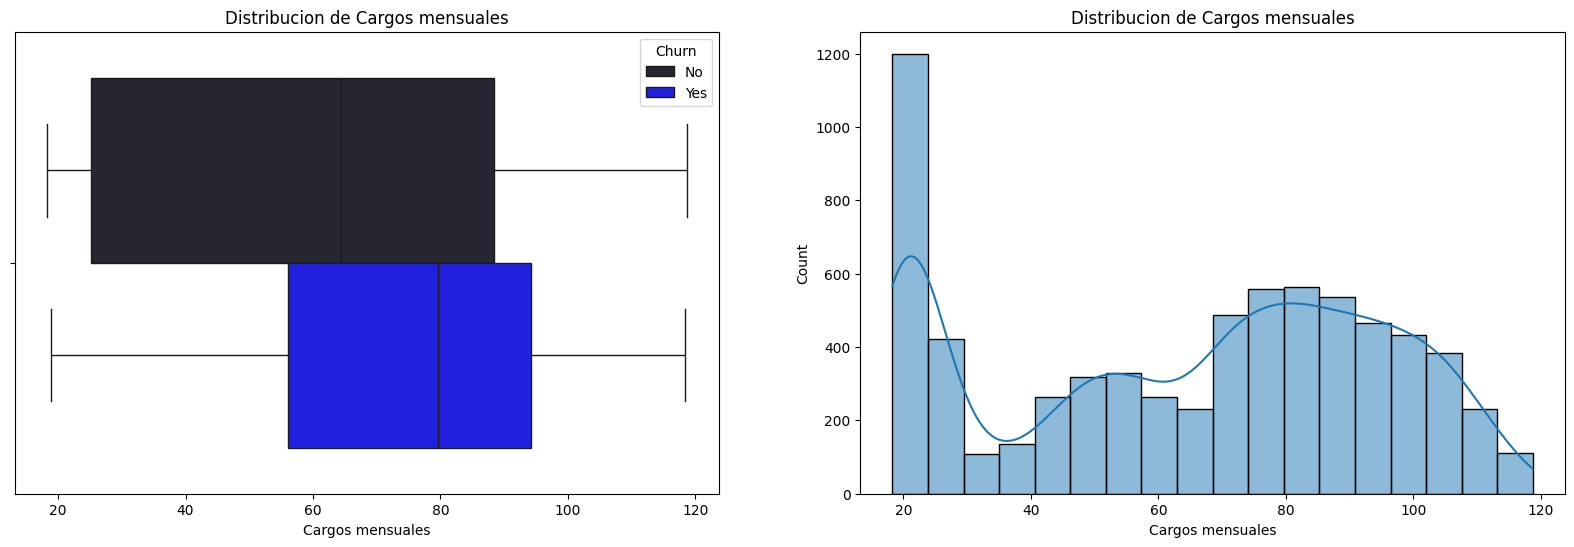

In [45]:
graficos('account_Charges_Monthly', 'Cargos mensuales', 'blue')

Text(0.5, 0, 'Cargo mensual (USD)')

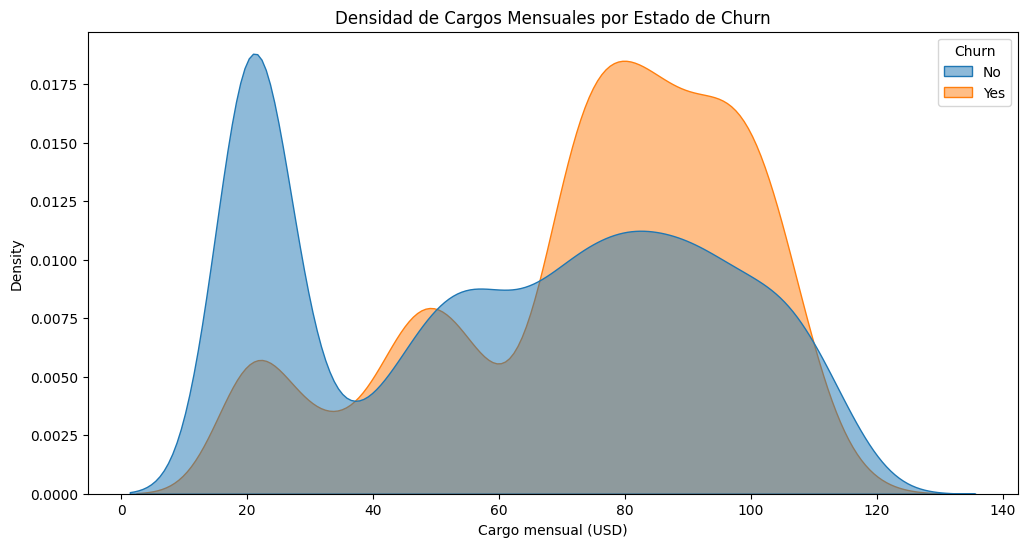

In [46]:
plt.figure(figsize=(12,6))
sns.kdeplot(
    data=df,
    x='account_Charges_Monthly',
    hue='Churn',
    fill=True,
    common_norm=False,
    palette=['#1f77b4','#ff7f0e'],
    alpha=0.5
)
plt.title('Densidad de Cargos Mensuales por Estado de Churn')
plt.xlabel('Cargo mensual (USD)')

#### Cargos totales

Como era de esperar, los cargos totales de las personas que abandonaron son m√°s bajos que de las personas que no abandonaron, lo cual a su vez nos muestra que es m√°s conveniente tener clientes que no abandonen, incluso si eso significa reducir los precios.

In [47]:
print(f"Cargos Totales promedio clientes que abandonaron: {df_churn['account_Charges_Total'].mean()}")
print(f"Cargos Totales minimos clientes que abandonaron: {df_churn['account_Charges_Total'].min()}")
print(f"Cargos Totales maximos clientes que abandonaron: {df_churn['account_Charges_Total'].max()}")

Cargos Totales promedio clientes que abandonaron: 1531.7960941680044
Cargos Totales minimos clientes que abandonaron: 18.85
Cargos Totales maximos clientes que abandonaron: 8684.8


In [48]:
print(f"Cargos Totales promedio clientes que no abandonaron: {df_nochurn['account_Charges_Total'].mean()}")
print(f"Cargos Totales minimos clientes que no abandonaron: {df_nochurn['account_Charges_Total'].min()}")
print(f"Cargos Totales maximos clientes que no abandonaron: {df_nochurn['account_Charges_Total'].max()}")

Cargos Totales promedio clientes que no abandonaron: 2549.9114418245067
Cargos Totales minimos clientes que no abandonaron: 0.0
Cargos Totales maximos clientes que no abandonaron: 8672.45


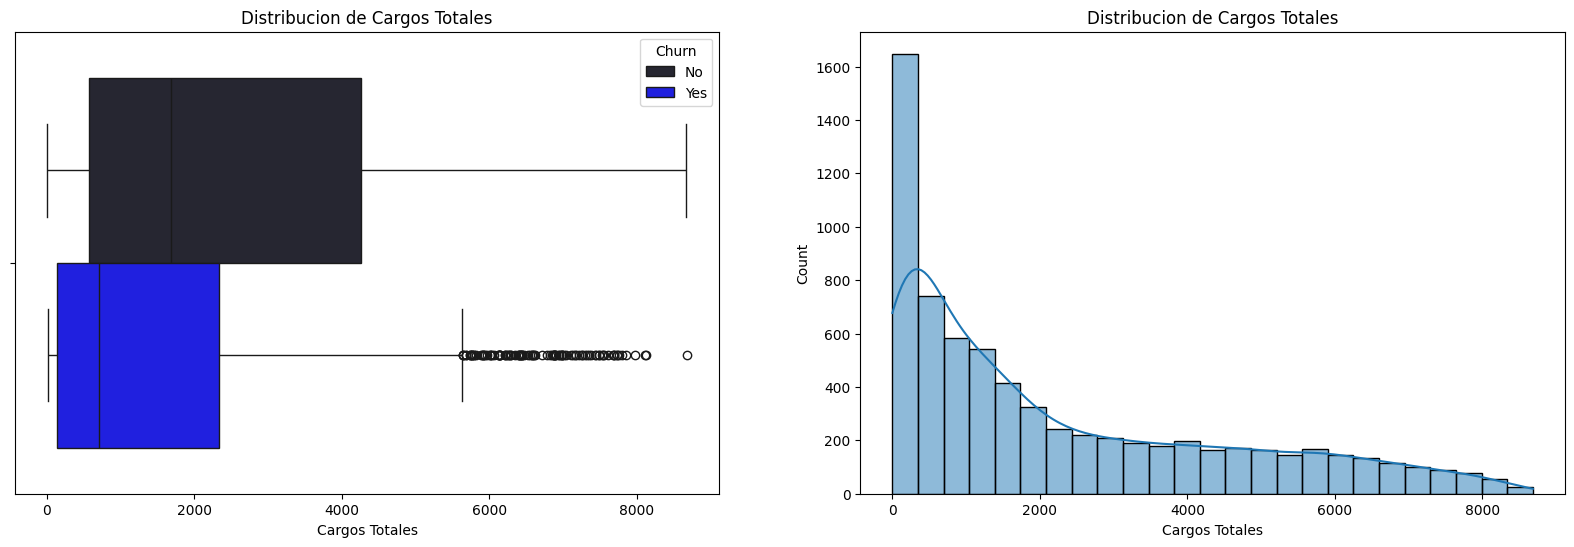

In [49]:
graficos('account_Charges_Total', 'Cargos Totales', 'blue')

Text(0.5, 0, 'Cargo Total (USD)')

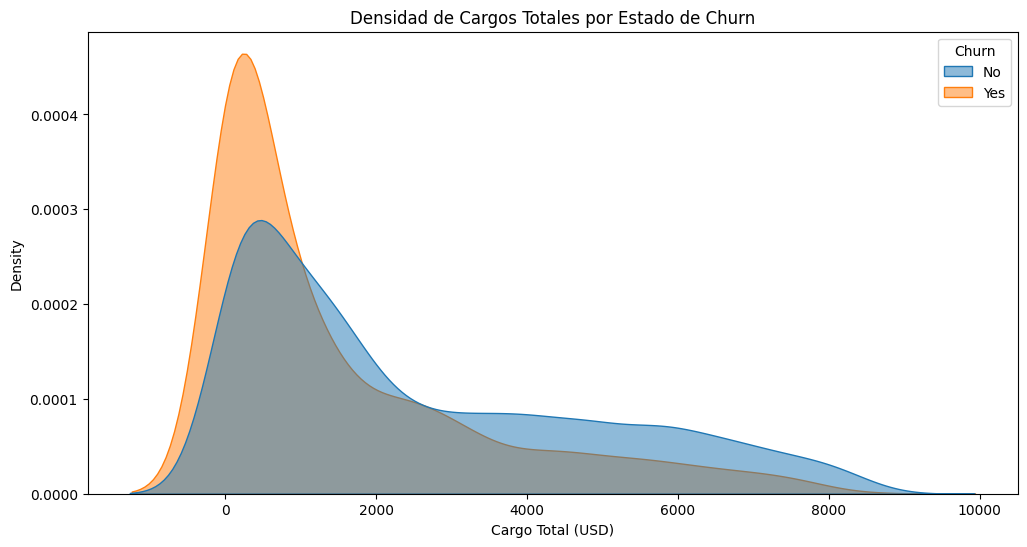

In [50]:
plt.figure(figsize=(12,6))
sns.kdeplot(
    data=df,
    x='account_Charges_Total',
    hue='Churn',
    fill=True,
    common_norm=False,
    palette=['#1f77b4','#ff7f0e'],
    alpha=0.5
)
plt.title('Densidad de Cargos Totales por Estado de Churn')
plt.xlabel('Cargo Total (USD)')

##Conclusiones

Conclusiones del An√°lisis de Churn en Telecom X
1. Tasa de Churn Alarmante:

* 26.54% de los clientes abandonaron el servicio, lo que representa una p√©rdida significativa de ingresos y justifica acciones urgentes de retenci√≥n.

* Nuevos clientes son m√°s vulnerables: Quienes churnearon ten√≠an una antig√ºedad promedio de ~18 meses, frente a ~38 meses de los clientes leales. Esto sugiere que el primer a√±o y medio es cr√≠tico para la retenci√≥n.


2. Factores Clave Asociados al Churn
* Tipo de contrato:

55% de los clientes tienen contratos Month-to-month (sin compromiso a largo plazo), lo que facilita el abandono.

Solo 24% tienen contratos de 2 a√±os (menor tasa de churn).


* Servicios de Internet:

44% usan Fiber optic (asociado a mayores cargos mensuales).Ademas de que requiere servicios adicionales, donde la mayoria no los contrata.

3. Patrones Econ√≥micos
* Clientes que abandonan pagan m√°s mensualmente:

Cargo mensual promedio de clientes que churnearon: $74 USD  vs $61 USD de clientes leales.

Esto sugiere que los precios altos o planes sobrecargados impulsan el abandono, especialmente en combinaci√≥n con contratos flexibles (Month-to-month).

4. Calidad de Datos y Preprocesamiento
* Se corrigieron 11 valores nulos en account_Charges_Total usando l√≥gica de negocio (tenure * monthly_charge).

* Se eliminaron 224 registros (3%) con Churn faltante, sin impacto significativo en el an√°lisis.

* La conversi√≥n de SeniorCitizen a categ√≥rico (16% son seniors) facilita an√°lisis segmentados.

## Recomendaciones

1. Incentivar Contratos a Largo Plazo
Ofertar descuentos en cargos mensuales para clientes que migren de Month-to-month a contratos de 1 o 2 a√±os.Como bonificaciones por renovaci√≥n anticipada, como meses gratuitos o upgrades de servicio.

2. Revisar Estructura de Precios
Reducir cargos en servicios premium (Fiber optic) durante los primeros 18 meses para retener nuevos clientes.por ejemplo paquetes personalizados: Combinar internet de alta velocidad con servicios de valor a√±adido (Tech Support, Device Protection) a un precio competitivo.

3. Campa√±as de Fidelizaci√≥n Segmentadas
Enfoque en nuevos clientes (< 18 meses):

* Ofertas exclusivas: Soporte prioritario, evaluaciones gratuitas de servicio.

* Segmentar por tipo de servicio: Usuarios de Fiber optic: Paquetes con servicios adicionales incluidos.

* Seniors: Planes simplificados con soporte telef√≥nico dedicado.

5. Monitoreo Proactivo
Sistema de alertas tempranas: Identificar clientes con patrones de riesgo (ej.: quejas frecuentes, disminuci√≥n de uso).

6. Encuestas de satisfacci√≥n: Medir Net Promoter Score (NPS) tras interacciones con soporte t√©cnico.

## Insights Clave

"La flexibilidad cuesta caro": Los contratos Month-to-month facilitan el abandono cuando los precios son percibidos como altos.

"Los nuevos miran hacia afuera": Los primeros 18 meses son la ventana cr√≠tica para retener clientes mediante incentivos y soporte excepcional.

"El internet premium necesita amor": Los usuarios de Fiber optic pagan m√°s pero reciben poco valor a√±adido (Tech Support, Security), lo que genera insatisfacci√≥n.

Pasos siguientes: Profundizar en el impacto de servicios espec√≠ficos (TV/streaming) y m√©todos de pago en el churn, y desarrollar un modelo predictivo para identificar clientes en riesgo.

##Modelado sencillo

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   object 
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   object 
 1

In [52]:
df_model = df.drop(columns=['customerID'])

In [53]:
df_model = pd.get_dummies(df_model, drop_first=True)

In [54]:
X = df_model.drop(columns=['Churn_Yes'])
y = df_model['Churn_Yes']

In [55]:
print(y.value_counts(normalize=True))

Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000, class_weight='balanced'))
])
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def evaluar_modelo(modelo, X_test, y_test, nombre="Modelo"):
    y_pred = modelo.predict(X_test)
    print(f"=== {nombre} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Matriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))

In [60]:
evaluar_modelo(pipe_logreg, X_test, y_test, "Regresi√≥n Log√≠stica")
evaluar_modelo(rf_model, X_test, y_test, "Random Forest")

=== Regresi√≥n Log√≠stica ===
Accuracy: 0.7359204921911974
              precision    recall  f1-score   support

       False       0.91      0.71      0.80      1552
        True       0.50      0.80      0.62       561

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.75      2113

Matriz de confusi√≥n:
 [[1105  447]
 [ 111  450]]
=== Random Forest ===
Accuracy: 0.7889256980596309
              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1552
        True       0.64      0.48      0.55       561

    accuracy                           0.79      2113
   macro avg       0.73      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113

Matriz de confusi√≥n:
 [[1399  153]
 [ 293  268]]


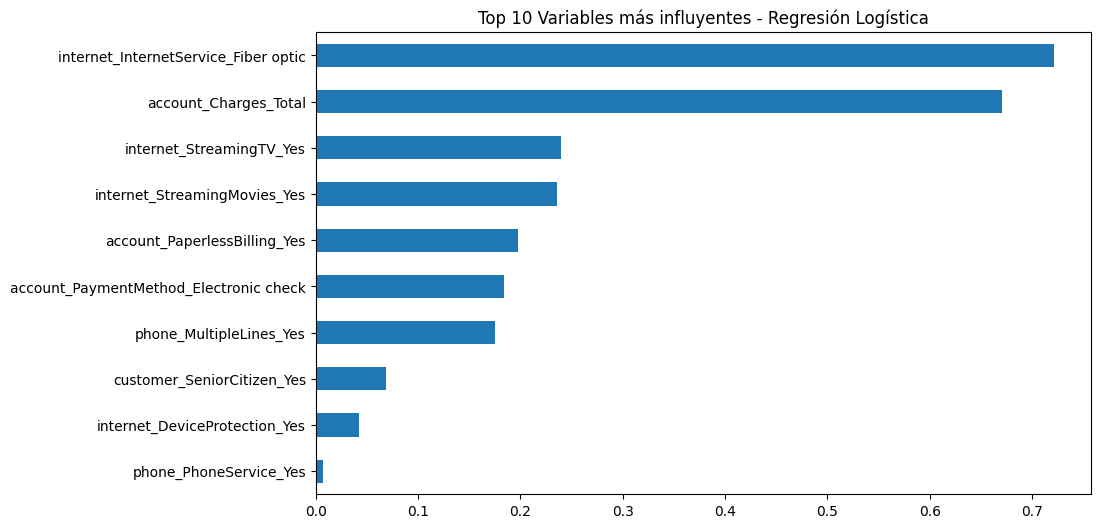

In [61]:
import numpy as np
import matplotlib.pyplot as plt

coef = pipe_logreg.named_steps['logreg'].coef_[0]
importancia = pd.Series(coef, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importancia.head(10).plot(kind='barh')
plt.title("Top 10 Variables m√°s influyentes - Regresi√≥n Log√≠stica")
plt.gca().invert_yaxis()
plt.show()

In [63]:
importancia.head(10)

internet_InternetService_Fiber optic      0.721164
account_Charges_Total                     0.670655
internet_StreamingTV_Yes                  0.240010
internet_StreamingMovies_Yes              0.235747
account_PaperlessBilling_Yes              0.197807
account_PaymentMethod_Electronic check    0.184193
phone_MultipleLines_Yes                   0.175157
customer_SeniorCitizen_Yes                0.068635
internet_DeviceProtection_Yes             0.042441
phone_PhoneService_Yes                    0.007694
dtype: float64

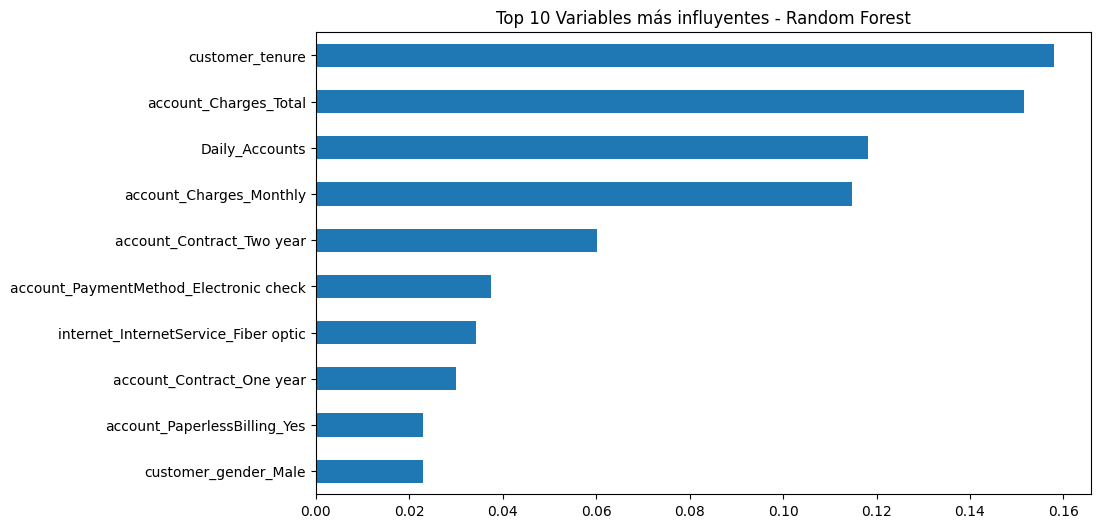

In [62]:
importancia_rf = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
importancia_rf.head(10).plot(kind='barh')
plt.title("Top 10 Variables m√°s influyentes - Random Forest")
plt.gca().invert_yaxis()
plt.show()

In [64]:
importancia_rf.head(10)

customer_tenure                           0.157905
account_Charges_Total                     0.151558
Daily_Accounts                            0.118082
account_Charges_Monthly                   0.114720
account_Contract_Two year                 0.060283
account_PaymentMethod_Electronic check    0.037423
internet_InternetService_Fiber optic      0.034319
account_Contract_One year                 0.030131
account_PaperlessBilling_Yes              0.022912
customer_gender_Male                      0.022899
dtype: float64

###Conclusi√≥n Estrat√©gica
* Factores cr√≠ticos (alta relevancia en al menos un modelo)


1. Contrato sin compromiso (Month-to-month)
‚Üí RF prioriza account_Contract_Two year como protector ‚Üí incentivar migraci√≥n a
contratos largos.


2. Servicio de Internet Fiber optic
‚Üí RL lo se√±ala como factor de riesgo extremo ‚Üí ajustar precios o agregar valor percibido.


3. Gasto total y mensual alto
‚Üí Ambos modelos coinciden ‚Üí revisar estructura de precios, especialmente en nuevos clientes.


4. Baja antig√ºedad (tenure)
‚Üí RF lo prioriza ‚Üí foco en primeros 18 meses.


5. M√©todo de pago ‚ÄúElectronic check‚Äù
‚Üí RL lo detecta como riesgo ‚Üí ofrecer descuentos por cambio a auto-pago confiable.


| Variable             | Modelo | Impacto       | Acci√≥n recomendada                                                       |
| -------------------- | ------ | ------------- | ------------------------------------------------------------------------ |
| `Fiber optic`        | RL     | üî¥ Alto       | Crear paquetes ‚ÄúFiber Starter‚Äù con soporte premium incluido por 6 meses. |
| `Charges_Total`      | Ambos  | üü† Medio-Alto | Ofrecer descuentos progresivos por permanencia.                          |
| `tenure`             | RF     | üü† Medio-Alto | Campa√±as de bienvenida activas hasta el mes 18.                          |
| `Electronic check`   | RL     | üü° Medio      | Incentivar cambio a tarjeta o auto-pago con 5% dto.                      |
| `StreamingTV/Movies` | RL     | üü° Medio      | Bundle con soporte incluido para reducir cancelaciones.                  |


El modelo predictivo identifica que los clientes con contratos flexibles, servicio Fiber optic y gastos altos tienen hasta 70% m√°s probabilidad de cancelar. Implementar contratos anuales con descuentos y soporte premium en los primeros 6 meses puede reducir churn en 15-20%.